In [27]:
using PyPlot
using Statistics

# Расчет набега фазы, связанного с модификацией профиля
$$
\Delta \varphi = \varphi(\omega,t_1) - \varphi(\omega,t_0) = \frac{2\omega}{c}\left [\int_{0}^{z_{0}}\sqrt{\varepsilon \left ( \omega,\omega_{\text{pe}}\left ( z,t_{1} \right ) \right )}\mathrm{d}z-
	\int_{0}^{z_{0}}\sqrt{\varepsilon \left ( \omega,\omega_{\text{pe}}\left ( z,t_{0} \right ) \right )}\mathrm{d}z \right ]
$$

$$ \varepsilon(\omega,\omega_\text{pe}) = 1-\frac{\omega_\text{pe}^2}{\omega^2}$$

Круговая плазменная частота:
$$
\omega_{\text{pe}}\Big[\frac{\text{rad}}{\text{s}}\Big]=\sqrt{\frac{4\pi N_\text{e} e^2}{m_\text{e}}}
$$
$$\quad \omega_{\text{pe}}= 2\pi \cdot 8979.18235285877 \cdot \sqrt{N_e [cm^{-3}]} \;\text{ - расчетная формула}.
$$
$z_0$ - высота отражения волны с частотой $\omega$.

In [3]:
include("calculation_of_phase_variations.jl");

In [24]:
fmax = 5000000
Nmax = fpe_to_Ne(fmax)
f_pump = 4600000
z1, z2, zmax = 150000, 350000, 250000
N_pump = fpe_to_Ne(f_pump)
dN = 0.1*N_pump
z0, d_z = 210808.0, 3000
t_r, t_d, tau_r, tau_d = 0.0, 6.0, 1., 10.;

In [48]:
z_axe = 200000:225000;
t = 0.1
N_axe = zeros(length(z_axe),10);
N0_axe = zeros(length(z_axe));
for j=1:10
    for i=1:length(z_axe)
        N_axe[i,j] = N_model_fun(z_axe[i], t, z1, z2, zmax, dN, z0, d_z, t_r, t_d, j, tau_d)
    end
end

for i=1:length(z_axe)
    N0_axe[i] = N_model_fun(z_axe[i], 0., z1, z2, zmax, dN, z0, d_z, t_r, t_d, tau_r, tau_d)
end


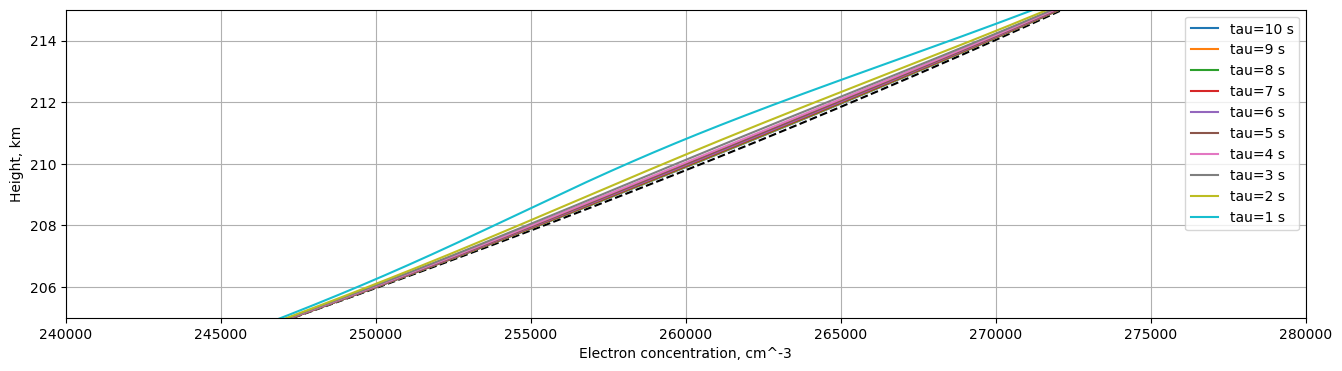

In [74]:
figure(figsize=(16,4))
plot(N0_axe,z_axe/1e3,"k--")   
for j = 10:-1:1
    plot(N_axe[:,j],z_axe/1e3,label=string("tau=",j, " s"))   
end
ylim(205,215)
xlim(240000,280000)
ylabel("Height, km")
xlabel("Electron concentration, cm^-3")
grid()
legend();
savefig("temp1.png")

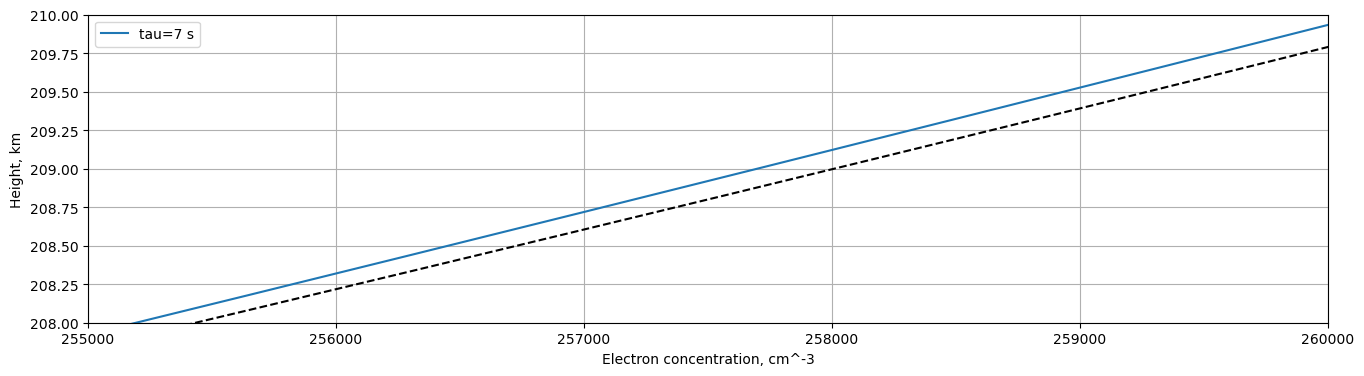

In [78]:
figure(figsize=(16,4))
plot(N0_axe,z_axe/1e3,"k--")   
plot(N_axe[:,7],z_axe/1e3,label=string("tau=",7, " s"))   
ylim(208,210)
xlim(255000,260000)
ylabel("Height, km")
xlabel("Electron concentration, cm^-3")
grid()
legend();
savefig("temp1_plus.png")

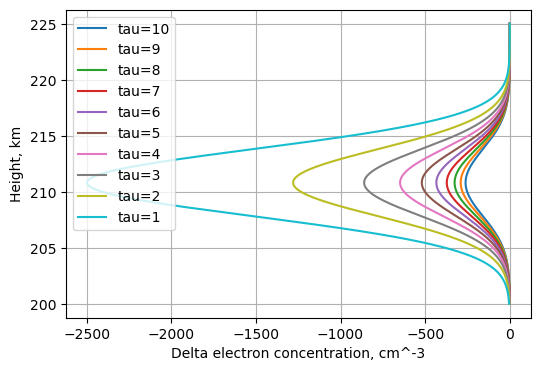

In [65]:
figure(figsize=(6,4))
for j = 10:-1:1
    plot(N_axe[:,j].-N0_axe,z_axe/1e3,label=string("tau=",j))   
end
ylabel("Height, km")
xlabel("Delta electron concentration, cm^-3")
grid()
legend();
savefig("temp2.png")

In [25]:
f_axe = 4e6:1000.:5e6
ω_axe = 2pi*f_axe
t_axe = 0.0:0.1:60.
z_step = 1.
DPhi = zeros(10,length(f_axe));

In [58]:
for i=10:-1:1
    print(i," ")   
    for j=1:length(f_axe)                      
        DPhi[i,j] = phase_variations(ω_axe[j], t_axe[1], t_axe[2], z_step, z1, z2, zmax, dN, z0, d_z, t_r, t_d, i, tau_d)
    end
end

10 9 8 7 6 5 4 3 2 1 

In [28]:
println(minimum(DPhi)," ", Statistics.mean(DPhi), " ", maximum(DPhi))

0.0 0.022108614630027952 41.654201752184235


In [29]:
println(minimum(DPhi)," ", Statistics.mean(DPhi), " ", maximum(DPhi))

0.0 0.022108614630027952 41.654201752184235


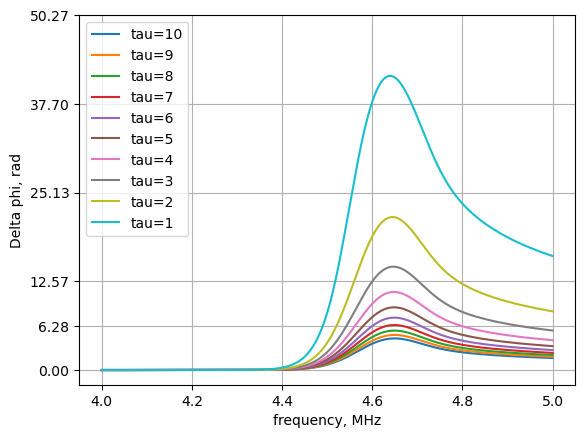

In [71]:
for i=10:-1:1
    plot(f_axe/1e6,DPhi[i,:],label=string("tau=",i))    
end
#xlim(4.4,4.6)
ylabel("Delta phi, rad")
xlabel("frequency, MHz")
yticks([0, 2pi, 4pi, 8pi, 12pi, 16pi])
grid()
legend();
savefig("temp3.png")